In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util_sp_ladung_dezentral import LadungHeizung, LadungBaden, SpTemperatur

100.0
11.538461538461538


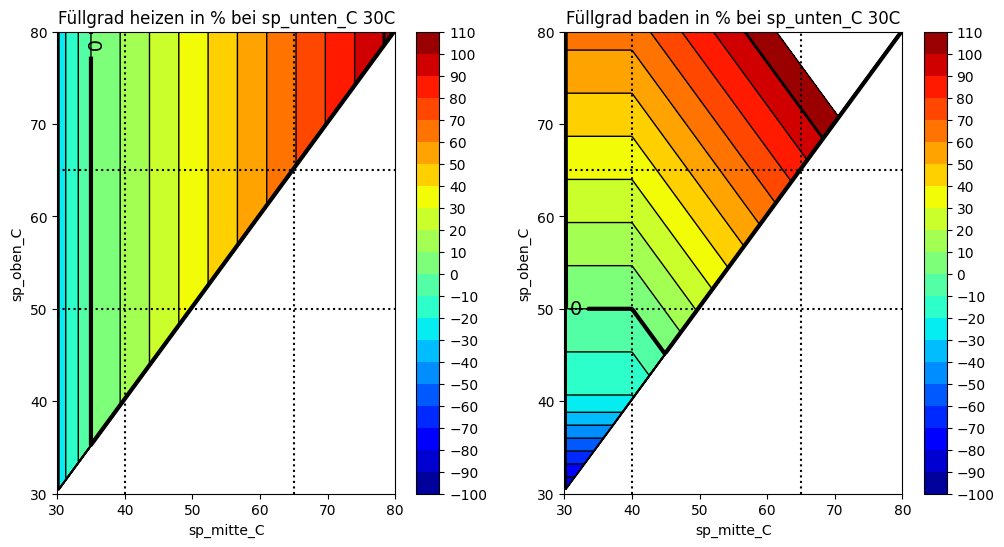

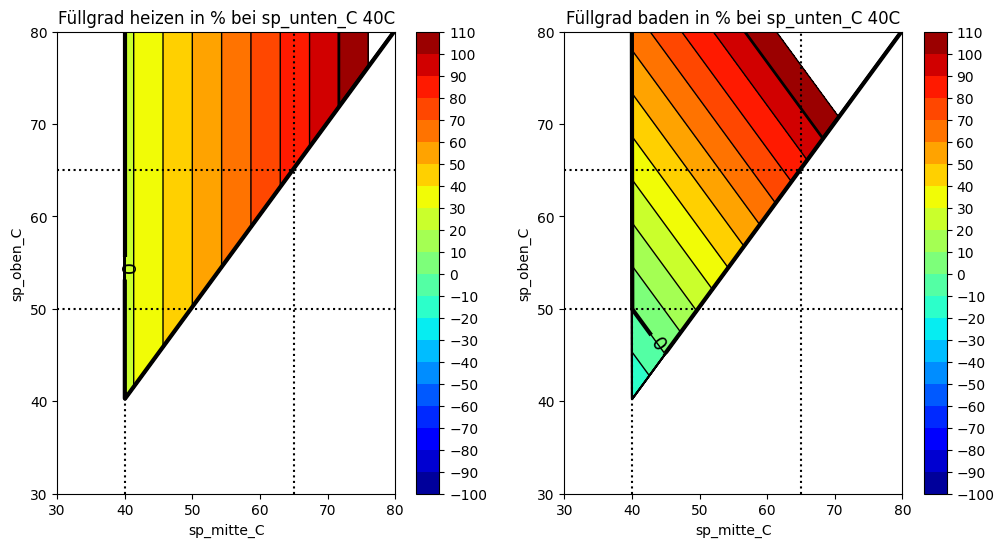

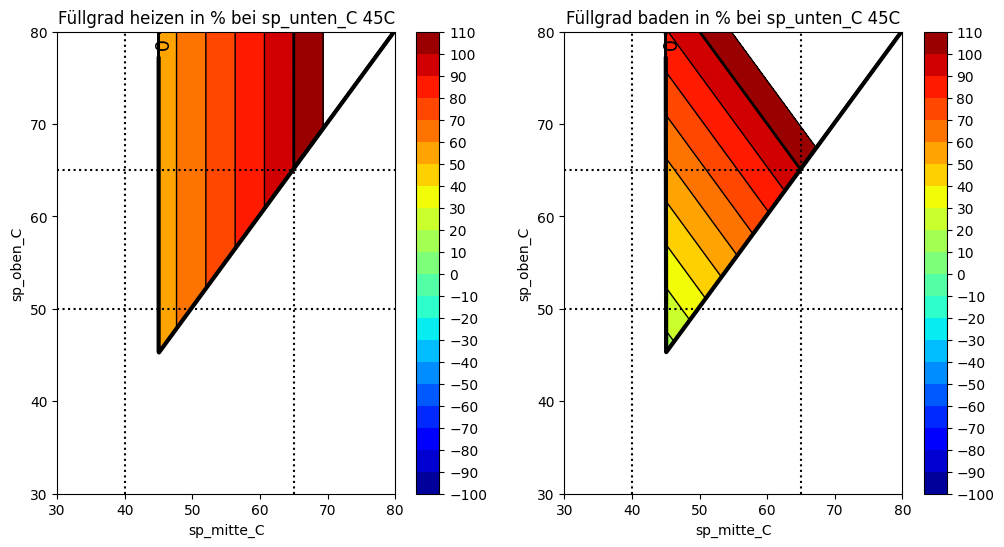

In [2]:
mitte_linspace = np.linspace(30, 80, 200)
oben_linspace = np.linspace(30, 80, 200)

Z = np.zeros((len(mitte_linspace), len(oben_linspace)))

levels = np.linspace(-100, 110, 22)

for dezentral_unten_C in [30, 40, 45]:
    # fig,ax=plt.subplots(1,1)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 Reihe, 2 Spalten

    durchlauf = ["heizen", "baden"]

    for ax, durchlauf in zip(axs, durchlauf):

        for i, mitte_C in enumerate(mitte_linspace):
            for j, oben_C in enumerate(oben_linspace):
                if mitte_C > dezentral_unten_C and oben_C > mitte_C:
                    sp_temperatur = SpTemperatur(dezentral_unten_C, mitte_C, oben_C)
                    if durchlauf == "heizen":
                        Z[j, i] = LadungHeizung(sp_temperatur).ladung_prozent
                    else:
                        Z[j, i] = LadungBaden(sp_temperatur).ladung_prozent
                else:
                    Z[j, i] = -200.0  # nicht moeglich

        cp = ax.contourf(
            mitte_linspace, oben_linspace, Z, levels=levels, cmap="jet"
        )  # cmap: https://matplotlib.org/stable/users/explain/colors/colormaps.html
        cbar = fig.colorbar(cp, extend="min")
        cbar.set_ticks(levels)
        # fig.colorbar(cp) # Add a colorbar to a plot
        ax.set_xticks(range(20, 90, 10))
        ax.set_yticks(range(20, 90, 10))
        contour1 = ax.contour(
            mitte_linspace,
            oben_linspace,
            Z,
            levels=[0],
            colors="black",
            linestyles="solid",
            linewidths=3,
        )
        contour2 = ax.contour(
            mitte_linspace,
            oben_linspace,
            Z,
            levels=[100],
            colors="black",
            linestyles="solid",
            linewidths=2,
        )
        plt.clabel(contour1, inline=True, fontsize=14)
        # plt.clabel(contour2, inline=True, fontsize=8)
        for level in levels:
            contour = ax.contour(
                mitte_linspace,
                oben_linspace,
                Z,
                levels=[level],
                colors="black",
                linestyles="solid",
                linewidths=1,
            )
            # plt.clabel(contour, inline=True, fontsize=10)
        ax.axhline(y=50, color="black", linestyle="dotted")
        ax.axhline(y=65, color="black", linestyle="dotted")
        ax.axvline(x=40, color="black", linestyle="dotted")
        ax.axvline(x=65, color="black", linestyle="dotted")
        if durchlauf == "heizen":
            ax.set_title(
                f"Füllgrad heizen in % bei sp_unten_C {dezentral_unten_C}C", fontsize=12
            )
        else:
            ax.set_title(
                f"Füllgrad baden in % bei sp_unten_C {dezentral_unten_C}C", fontsize=12
            )

        ax.set_xlabel("sp_mitte_C")
        ax.set_ylabel("sp_oben_C")
    plt.show()